In [1]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Define font to avoid displaying square boxes in plot text
plt.rcParams['font.sans-serif'] = ['STSong']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# Define the system of dynamic equations
def EGT(Fx, t, R1, R2, F1, F2, S1, S2, V1, V2, K, m, n, delta,
        I1, P, Chigh, Clow, D, I2, lambda_val, DeltaU,  H, C, N):
    x, y, z = Fx.tolist()
    dxdt = x * (1 - x) * (R1 - R2 + (S2 - S1 + F2 - F1) * y + n * (P - I1) * z - delta * n * (P - I1) * y * z)
    dydt = y * (1 - y) * (S2 + m * n * (Clow - Chigh) + F2 + x * (S1 - S2 + delta * m * n * (K - Chigh - D) + (F1 - F2)) 
                          + x * z * ((1 + delta) * m * n * (K - D) + m * n * ((1 + 2 * delta) * Chigh + delta * Clow) 
                                     + delta * n * P - C))
    dzdt = z * (1 - z) * (V2 + DeltaU + x * (V1 - V2 + delta * m * n / N * H) 
                          + y * (lambda_val - 1) * DeltaU 
                          + x * y * (delta * n * I2 + delta ** 2 * m * n / N * H))
    return [dxdt, dydt, dzdt]


In [3]:
## Base parameters
base_args = (13975.2, 4658.4, 1418.74, 709.37, 100, 10, 0.01, 0, 3542.86, 4, 13, 2,
            2189.49, 200, 246.375, 492.75, 7130.73, 0.09, 0.029, 526000, 255.19, 1798.19, 26)

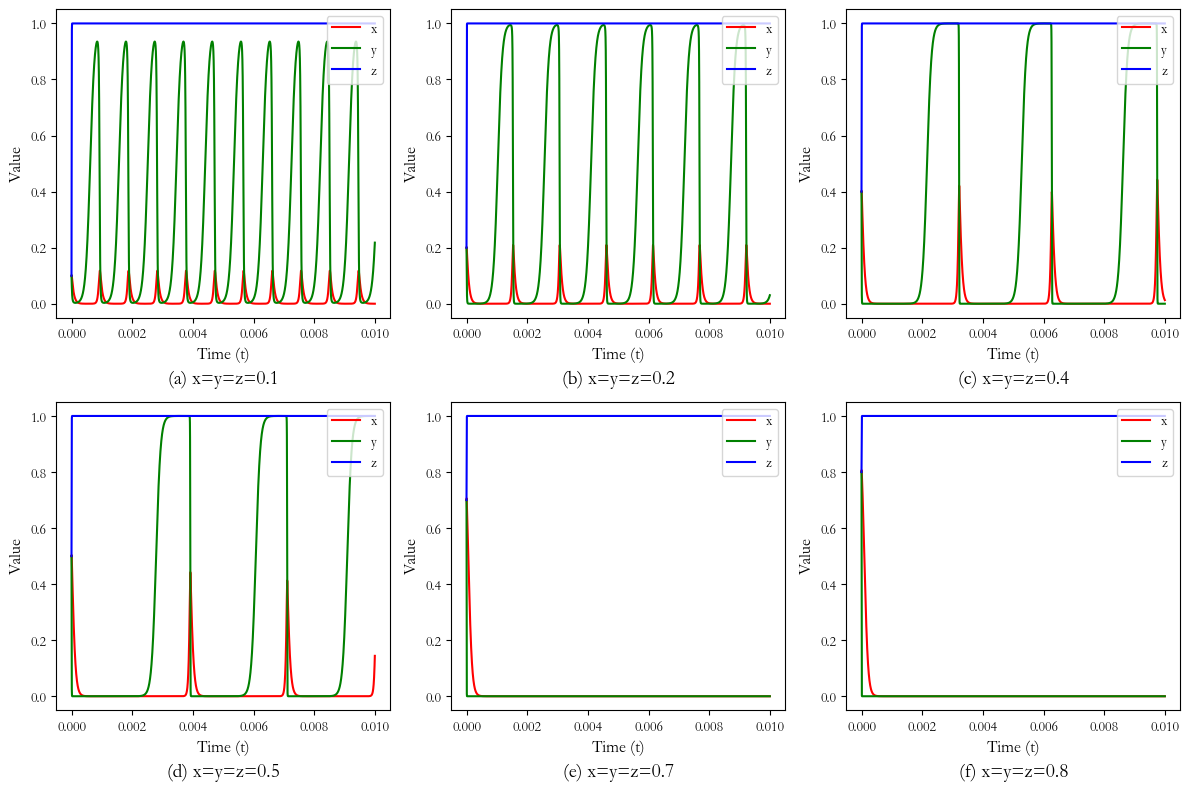

In [4]:
# Set plot parameters
plt.close("all")
fig = plt.figure(figsize=(12, 8))  # Adjust the figure size (more space for display)

# Use gridspec to adjust the layout, creating a 2x3 grid of 6 plots
gs = gridspec.GridSpec(2, 3)  # 2 rows, 3 columns

# Set initial value array
initial_values = [0.1, 0.2, 0.4, 0.5, 0.7, 0.8]

# Create 6 subplots to show how x, y, and z change over time for different initial values
axes = [fig.add_subplot(gs[i]) for i in range(6)]  # Six subplots

# Time range
t = np.arange(0, 0.01, 0.0000001)

# Plot the changes in x, y, z over time for each initial value
for i, init in enumerate(initial_values):
    track1 = odeint(EGT, (init, init, init), t, args=base_args)
    
    ax = axes[i]  # Select the corresponding subplot

    # Plot the changes in x, y, z over time
    ax.plot(t, track1[:, 0], label='x', linestyle='-', linewidth=1.5, color='r')  # x line
    ax.plot(t, track1[:, 1], label='y', linestyle='-', linewidth=1.5, color='g')  # y line
    ax.plot(t, track1[:, 2], label='z', linestyle='-', linewidth=1.5, color='b')  # z line

    # Set title and labels
    ax.set_xlabel('Time (t)', fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    
    # Set legend
    ax.legend(loc='upper right', fontsize=10)

    # Set title for each subplot
    ax.text(0.5, -0.2, f'({chr(97 + i)}) x=y=z={init}', ha='center', va='center', fontsize=14, transform=ax.transAxes)

# Adjust subplot layout
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for the title

plt.tight_layout()
plt.savefig('Figure6.pdf', format='pdf')

# Display the plot
plt.show()
